# 데이터 수집 및 **전처리** 과정

In [3]:
import os, cv2
import warnings
warnings.filterwarnings("ignore")

In [4]:
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout
from tensorflow.keras.layers import MaxPooling2D

import cv2


In [5]:
!unzip /content/drive/MyDrive/Sample.zip

Archive:  /content/drive/MyDrive/Sample.zip
   creating: 1.원천데이터/
   creating: 1.원천데이터/damage/
  inflating: 1.원천데이터/damage/0000002_as-0036229.jpg  
  inflating: 1.원천데이터/damage/0000003_as-0036229.jpg  
  inflating: 1.원천데이터/damage/0000004_as-0036229.jpg  
  inflating: 1.원천데이터/damage/0000005_as-0036229.jpg  
  inflating: 1.원천데이터/damage/0000006_as-0036229.jpg  
  inflating: 1.원천데이터/damage/0000007_as-0036229.jpg  
  inflating: 1.원천데이터/damage/0000009_sc-186320.jpg  
  inflating: 1.원천데이터/damage/0000011_sc-186320.jpg  
  inflating: 1.원천데이터/damage/0000012_sc-182987.jpg  
  inflating: 1.원천데이터/damage/0000013_as-0031772.jpg  
  inflating: 1.원천데이터/damage/0000014_as-0031772.jpg  
  inflating: 1.원천데이터/damage/0000017_as-2579102.jpg  
  inflating: 1.원천데이터/damage/0000020_as-0035991.jpg  
  inflating: 1.원천데이터/damage/0000021_as-0035991.jpg  
  inflating: 1.원천데이터/damage/0000022_as-0035991.jpg  
  inflating: 1.원천데이터/damage/0000023_sc-149923.jpg  
  inflating: 1.원천데이터/damage/0000025_sc-203122.jpg  
  inflati

In [6]:
img1_path = '/content/1.원천데이터/damage/'
mask1_path = '/content/2.라벨링데이터/damage/'

img1 = os.listdir(img1_path)
mask1 = os.listdir(mask1_path)

print(len(img1))
print(len(mask1))

img_dir = [img1_path + '/' + img_name for img_name in img1]
mask_dir = [mask1_path + '/' + mask_name for mask_name in mask1]

500
500


In [7]:
img_dir

['/content/1.원천데이터/damage//0000275_sc-217487.jpg',
 '/content/1.원천데이터/damage//0000220_sc-114703.jpg',
 '/content/1.원천데이터/damage//0000459_sc-226797.jpg',
 '/content/1.원천데이터/damage//0000064_sc-227004.jpg',
 '/content/1.원천데이터/damage//0000482_as-0037513.jpg',
 '/content/1.원천데이터/damage//0000076_as-0035111.jpg',
 '/content/1.원천데이터/damage//0000593_as-0081233.jpg',
 '/content/1.원천데이터/damage//0000052_as-0082746.jpg',
 '/content/1.원천데이터/damage//0000165_sc-175181.jpg',
 '/content/1.원천데이터/damage//0000144_sc-211946.jpg',
 '/content/1.원천데이터/damage//0000505_as-0074167.jpg',
 '/content/1.원천데이터/damage//0000531_as-2933655.jpg',
 '/content/1.원천데이터/damage//0000326_sc-118402.jpg',
 '/content/1.원천데이터/damage//0000172_sc-120410.jpg',
 '/content/1.원천데이터/damage//0000164_sc-143033.jpg',
 '/content/1.원천데이터/damage//0000395_as-0046441.jpg',
 '/content/1.원천데이터/damage//0000290_sc-136432.jpg',
 '/content/1.원천데이터/damage//0000224_sc-114703.jpg',
 '/content/1.원천데이터/damage//0000436_sc-164159.jpg',
 '/content/1.원천데이터/damag

In [8]:
img = sorted(img_dir)
mask = sorted(mask_dir)

In [9]:
img[:2]

['/content/1.원천데이터/damage//0000002_as-0036229.jpg',
 '/content/1.원천데이터/damage//0000003_as-0036229.jpg']

In [10]:
mask[:2]

['/content/2.라벨링데이터/damage//0000002_as-0036229.json',
 '/content/2.라벨링데이터/damage//0000003_as-0036229.json']

In [11]:
# 파일 이름만 변수 할당

img_name = [path.split('/')[-1] for path in img]
img_name = [name.split('.')[0] for name in img_name]
img_name[:2]

['0000002_as-0036229', '0000003_as-0036229']

In [12]:
mask_name = [path.split('/')[-1] for path in mask]
mask_name = [name.split('.')[0] for name in mask_name]
mask_name[:2]

['0000002_as-0036229', '0000003_as-0036229']

In [13]:
# 파일 이름 수 세기

from collections import Counter

# img_name = [name.split('.')[0] for name in img_name]
counter = Counter(img_name)

img_dict = sorted(counter.items(), key = lambda item : item[1],reverse = True)
img_dict[:5]

[('0000002_as-0036229', 1),
 ('0000003_as-0036229', 1),
 ('0000004_as-0036229', 1),
 ('0000005_as-0036229', 1),
 ('0000006_as-0036229', 1)]

In [14]:
# 파일 이름 수 세기

from collections import Counter

# img_name = [name.split('.')[0] for name in img_name]
counter = Counter(mask_name)

mask_dict = sorted(counter.items(), key = lambda item : item[1],reverse = True)
mask_dict[:5]

[('0000002_as-0036229', 1),
 ('0000003_as-0036229', 1),
 ('0000004_as-0036229', 1),
 ('0000005_as-0036229', 1),
 ('0000006_as-0036229', 1)]

In [15]:
# 서로 대응되지 않는 image/mask set 제거
Over_img_name = list(set(img_name)-set(mask_name))
Over_mask_name = list(set(mask_name)-set(img_name))

Over_img_index = [img_name.index(i) for i in Over_img_name]
Over_mask_index = [mask_name.index(i) for i in Over_mask_name]

print(Over_img_index)
print(Over_mask_index)

[]
[]


In [16]:
# 서로 대응되지 않는 image/mask set 제거
img = [img[i] for i,x in enumerate(img) if i not in Over_img_index]
mask = [mask[i] for i,x in enumerate(mask) if i not in Over_mask_index]
print(len(img),len(mask))

500 500


In [17]:
# Save train/test dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(img,mask,test_size=0.2,random_state=2)

In [18]:
import shutil

if not os.path.exists('/content/test_img'):
  os.mkdir('/content/test_img')
  for X_path in X_test:
    shutil.move(X_path,'/content/test_img')

if not os.path.exists('/content/test_mask'):
  os.mkdir('/content/test_mask')
  for y_path in y_test:
    shutil.move(y_path,'/content/test_mask')

In [19]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

400 400 100 100


In [20]:
# 데이터셋 경로 설정
import pandas as pd

DATA_DIR_train_img = '/content/1.원천데이터/damage/'
DATA_DIR_train_mask = '/content/2.라벨링데이터/damage/'
# DATA_DIR_val_img = '/content/val/img'
# DATA_DIR_val_mask = '/content/val/mask'
DATA_DIR_test_img = '/content/1.원천데이터/damage_part/'
DATA_DIR_test_mask = '/content/2.라벨링데이터/damage_part/'

class_dict = pd.DataFrame({'name': ['background','scratch'],'r':[0,255],'g':[0,255],'b':[0,255]},columns=['r','g','b'],index=['background','scratch'])

In [ ]:
# 모든 class 이름
class_names = class_dict.index.tolist() # 여러가지 손상 데이터 적용 가능
# RGB 값 
class_rgb_values = class_dict[['r','g','b']].values.tolist()

print('All dataset classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

All dataset classes and their corresponding RGB values in labels:
Class Names:  ['background', 'scratch']
Class RGB values:  [[0, 0, 0], [255, 255, 255]]


In [ ]:
# Getting specific classes to segment

# 데이터 셋에서 Segemntation을 수행할 class만 선택 
select_classes = ['background', 'scratch'] # 원하는 label 선택

# 선택한 class 의 RGB 값
select_class_indices = [class_names.index(cls.lower()) for cls in select_classes]
select_class_rgb_values =  np.array(class_rgb_values)[select_class_indices]

print('Selected classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

Selected classes and their corresponding RGB values in labels:
Class Names:  ['background', 'scratch']
Class RGB values:  [[0, 0, 0], [255, 255, 255]]


In [ ]:
# helper function for data visualization
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()

# Perform one hot encoding on label
def one_hot_encode(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes
    # Arguments
        label: The 2D array segmentation image label
        label_values
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)

    return semantic_map
    
# Perform reverse one-hot-encoding on labels / preds
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.
    # Arguments
        image: The one-hot format image 
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified 
        class key.
    """
    x = np.argmax(image, axis = -1)
    return x

# Perform colour coding on the reverse-one-hot outputs
def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.
    # Arguments
        image: single channel array where each value represents the class key.
        label_values

    # Returns
        Colour coded image for segmentation visualization
    """
    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album
import random 
import os, cv2
import numpy as np
import pandas as pd
import random, tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class BuildingsDataset(torch.utils.data.Dataset):

    """Massachusetts Buildings Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_rgb_values (list): RGB values of select classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            class_rgb_values=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        
        self.image_paths = [os.path.join(images_dir, image_id) for image_id in sorted(os.listdir(images_dir))]
        self.mask_paths = [os.path.join(masks_dir, image_id) for image_id in sorted(os.listdir(masks_dir))]

        self.class_rgb_values = class_rgb_values
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read images and masks
        image = cv2.cvtColor(cv2.imread(self.image_paths[i]), cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread(self.mask_paths[i]), cv2.COLOR_BGR2RGB)
        
        # one-hot-encode the mask
        mask = one_hot_encode(mask, self.class_rgb_values).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        # return length of 
        return len(self.image_paths)

# **기본모델**

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3), activation='relu',
                           kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
                          
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 18, 64)        102464    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 64)        

In [25]:
ins = model.inputs  # 모델 입력으로 (None, 100, 100, 3)의 형태를 갖습니다.
outs = model.layers[0].output # 첫번째 계층에 대한 출력으로 (None, 96, 96, 32)의 형태를 갖습니다.
feature_map = Model(inputs=ins, outputs=outs) # ins와 outs를 모델 입력과 출력으로 사용하여 특성 맵을 정의합니다.
feature_map.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 100, 100, 3)]    0         
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


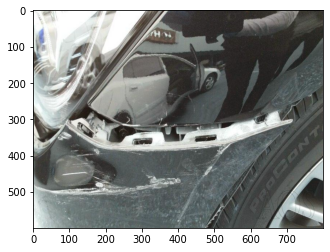

In [26]:
img=cv2.imread('/content/1.원천데이터/damage//0000283_as-0001700.jpg')
plt.imshow(img)

In [27]:
img = cv2.resize(img, (100,100)) # 이미지 크기 조정
input_img = np.expand_dims(img, axis=0) # 이미지 차원 조정
print(input_img.shape) # 입력 이미지 형태 출력  

(1, 100, 100, 3)


In [28]:
feature = feature_map.predict(input_img) #이미지를 모델에 적용
print(feature.shape) # 특성 맵에 대한 형태 출력


(1, 96, 96, 32)


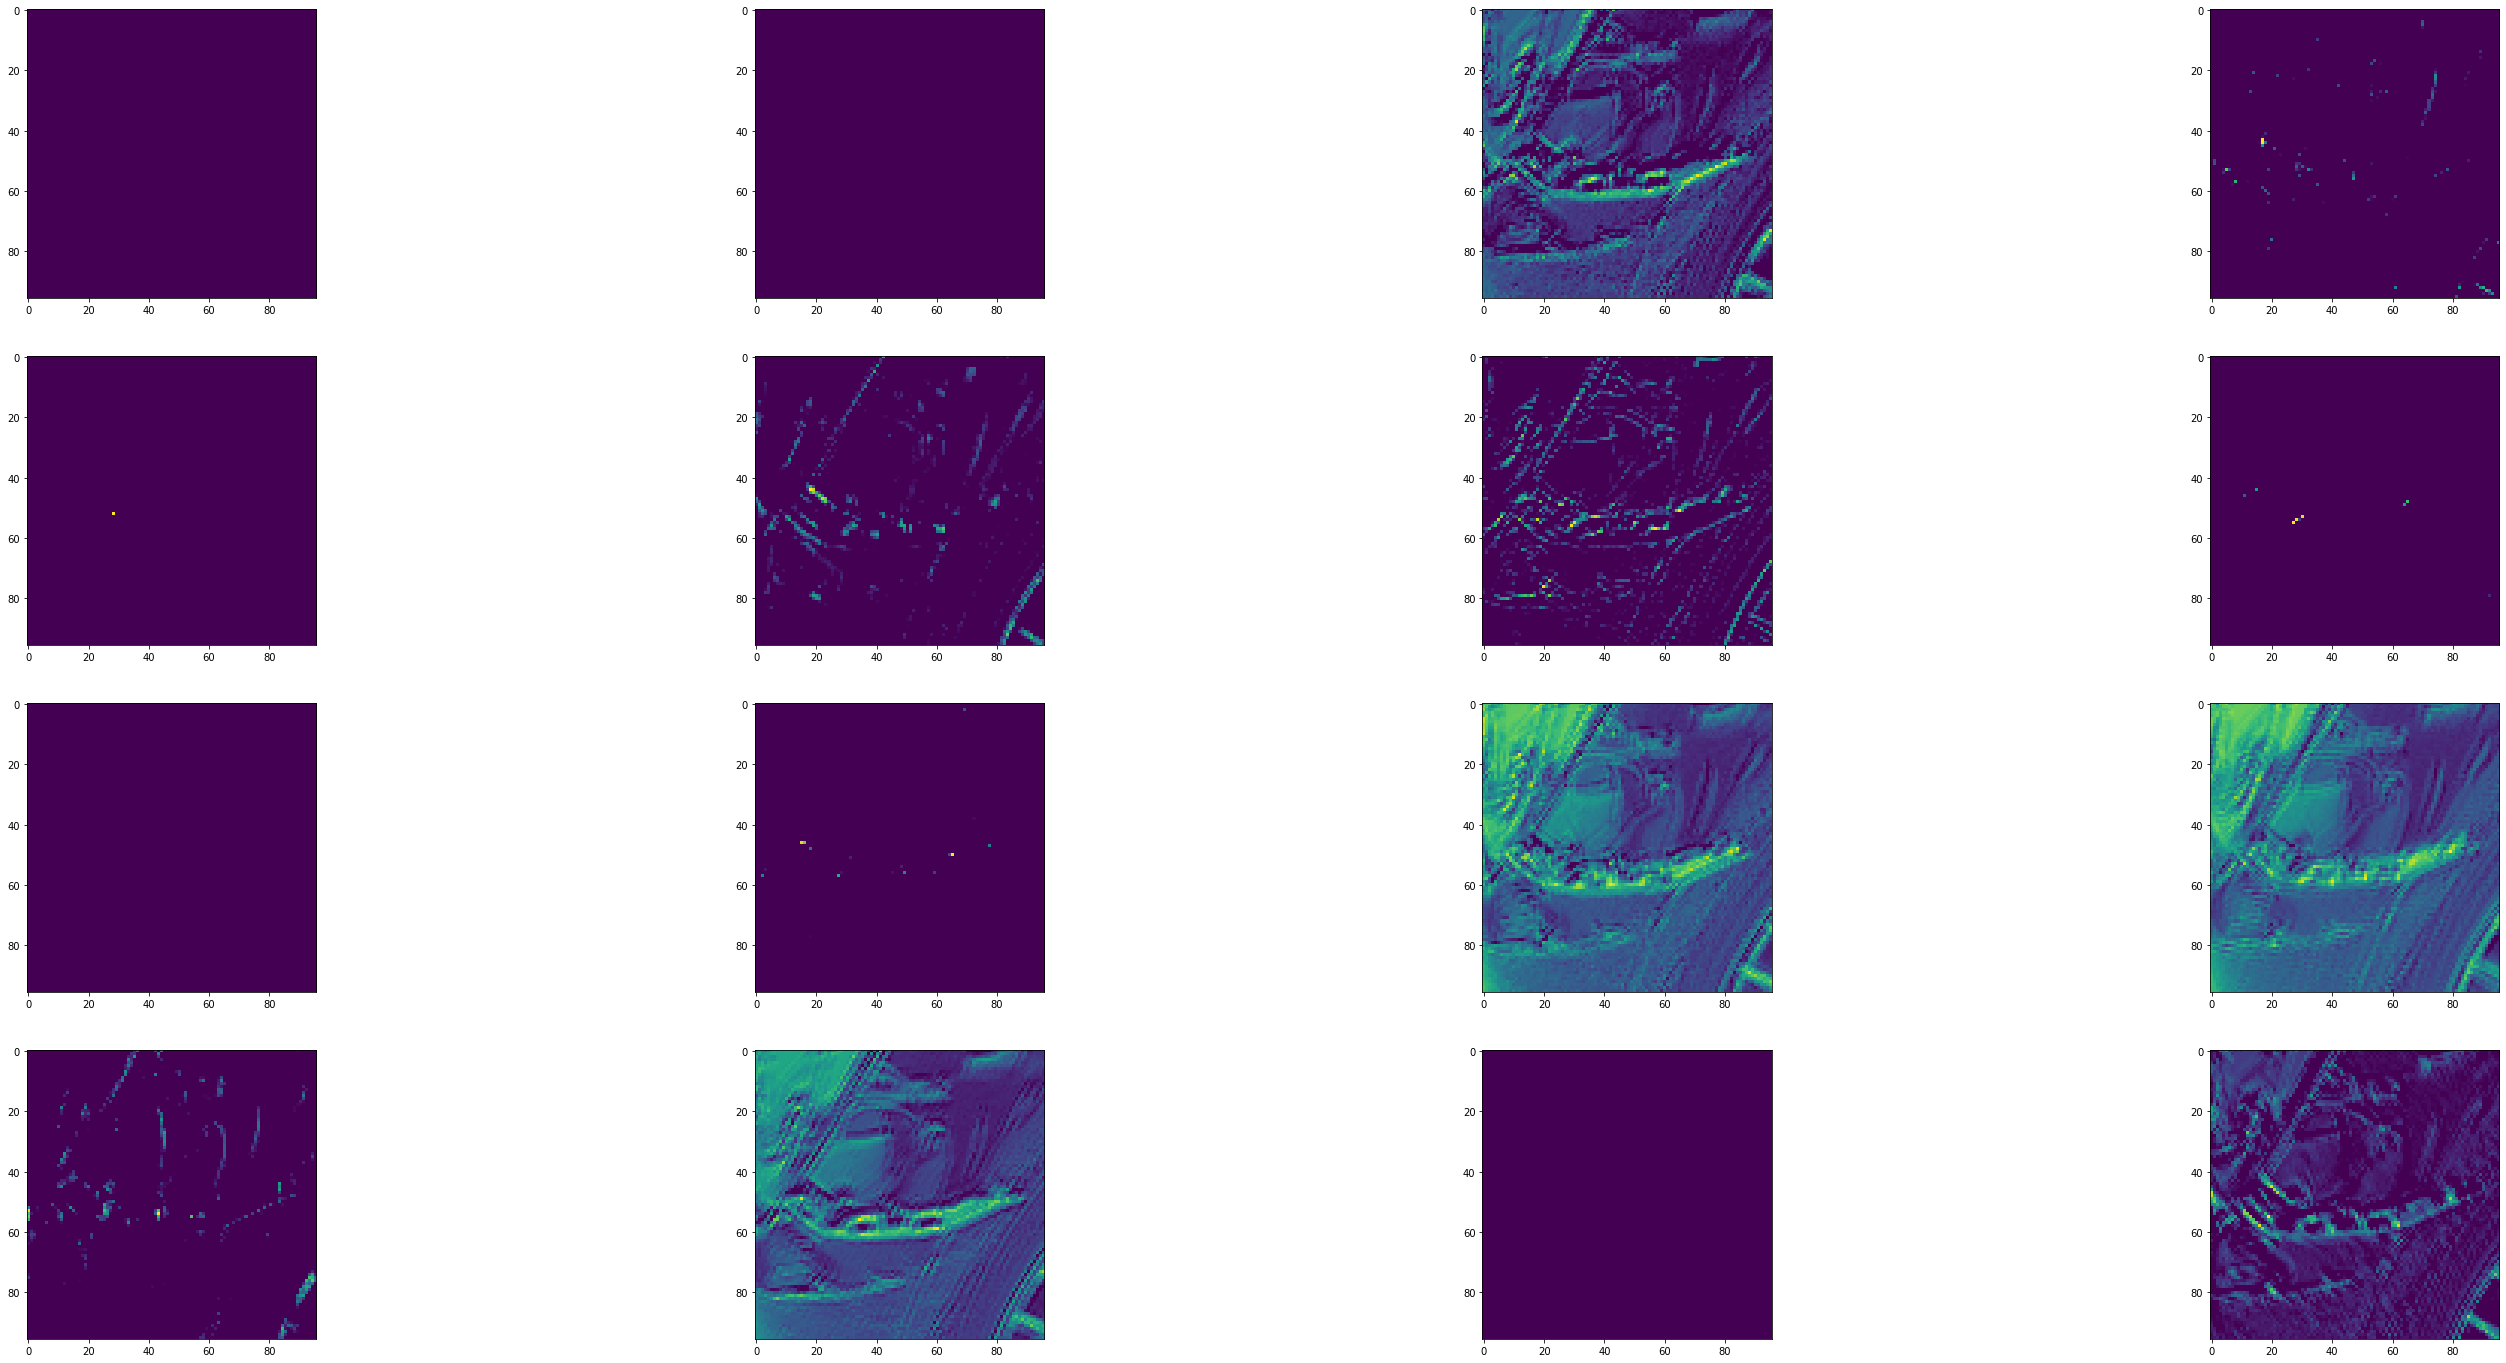

In [32]:
fig = plt.figure(figsize=(50,50))
for i in range(16):  #이미지 16개 출력
  ax = fig.add_subplot(8, 4, i+1) #subplot(m,n,p)는 m*n 그리드로 나누고, p로 지정된 위치에 자표축을 만듭니다.
  ax.imshow(feature[0,:,:,i])


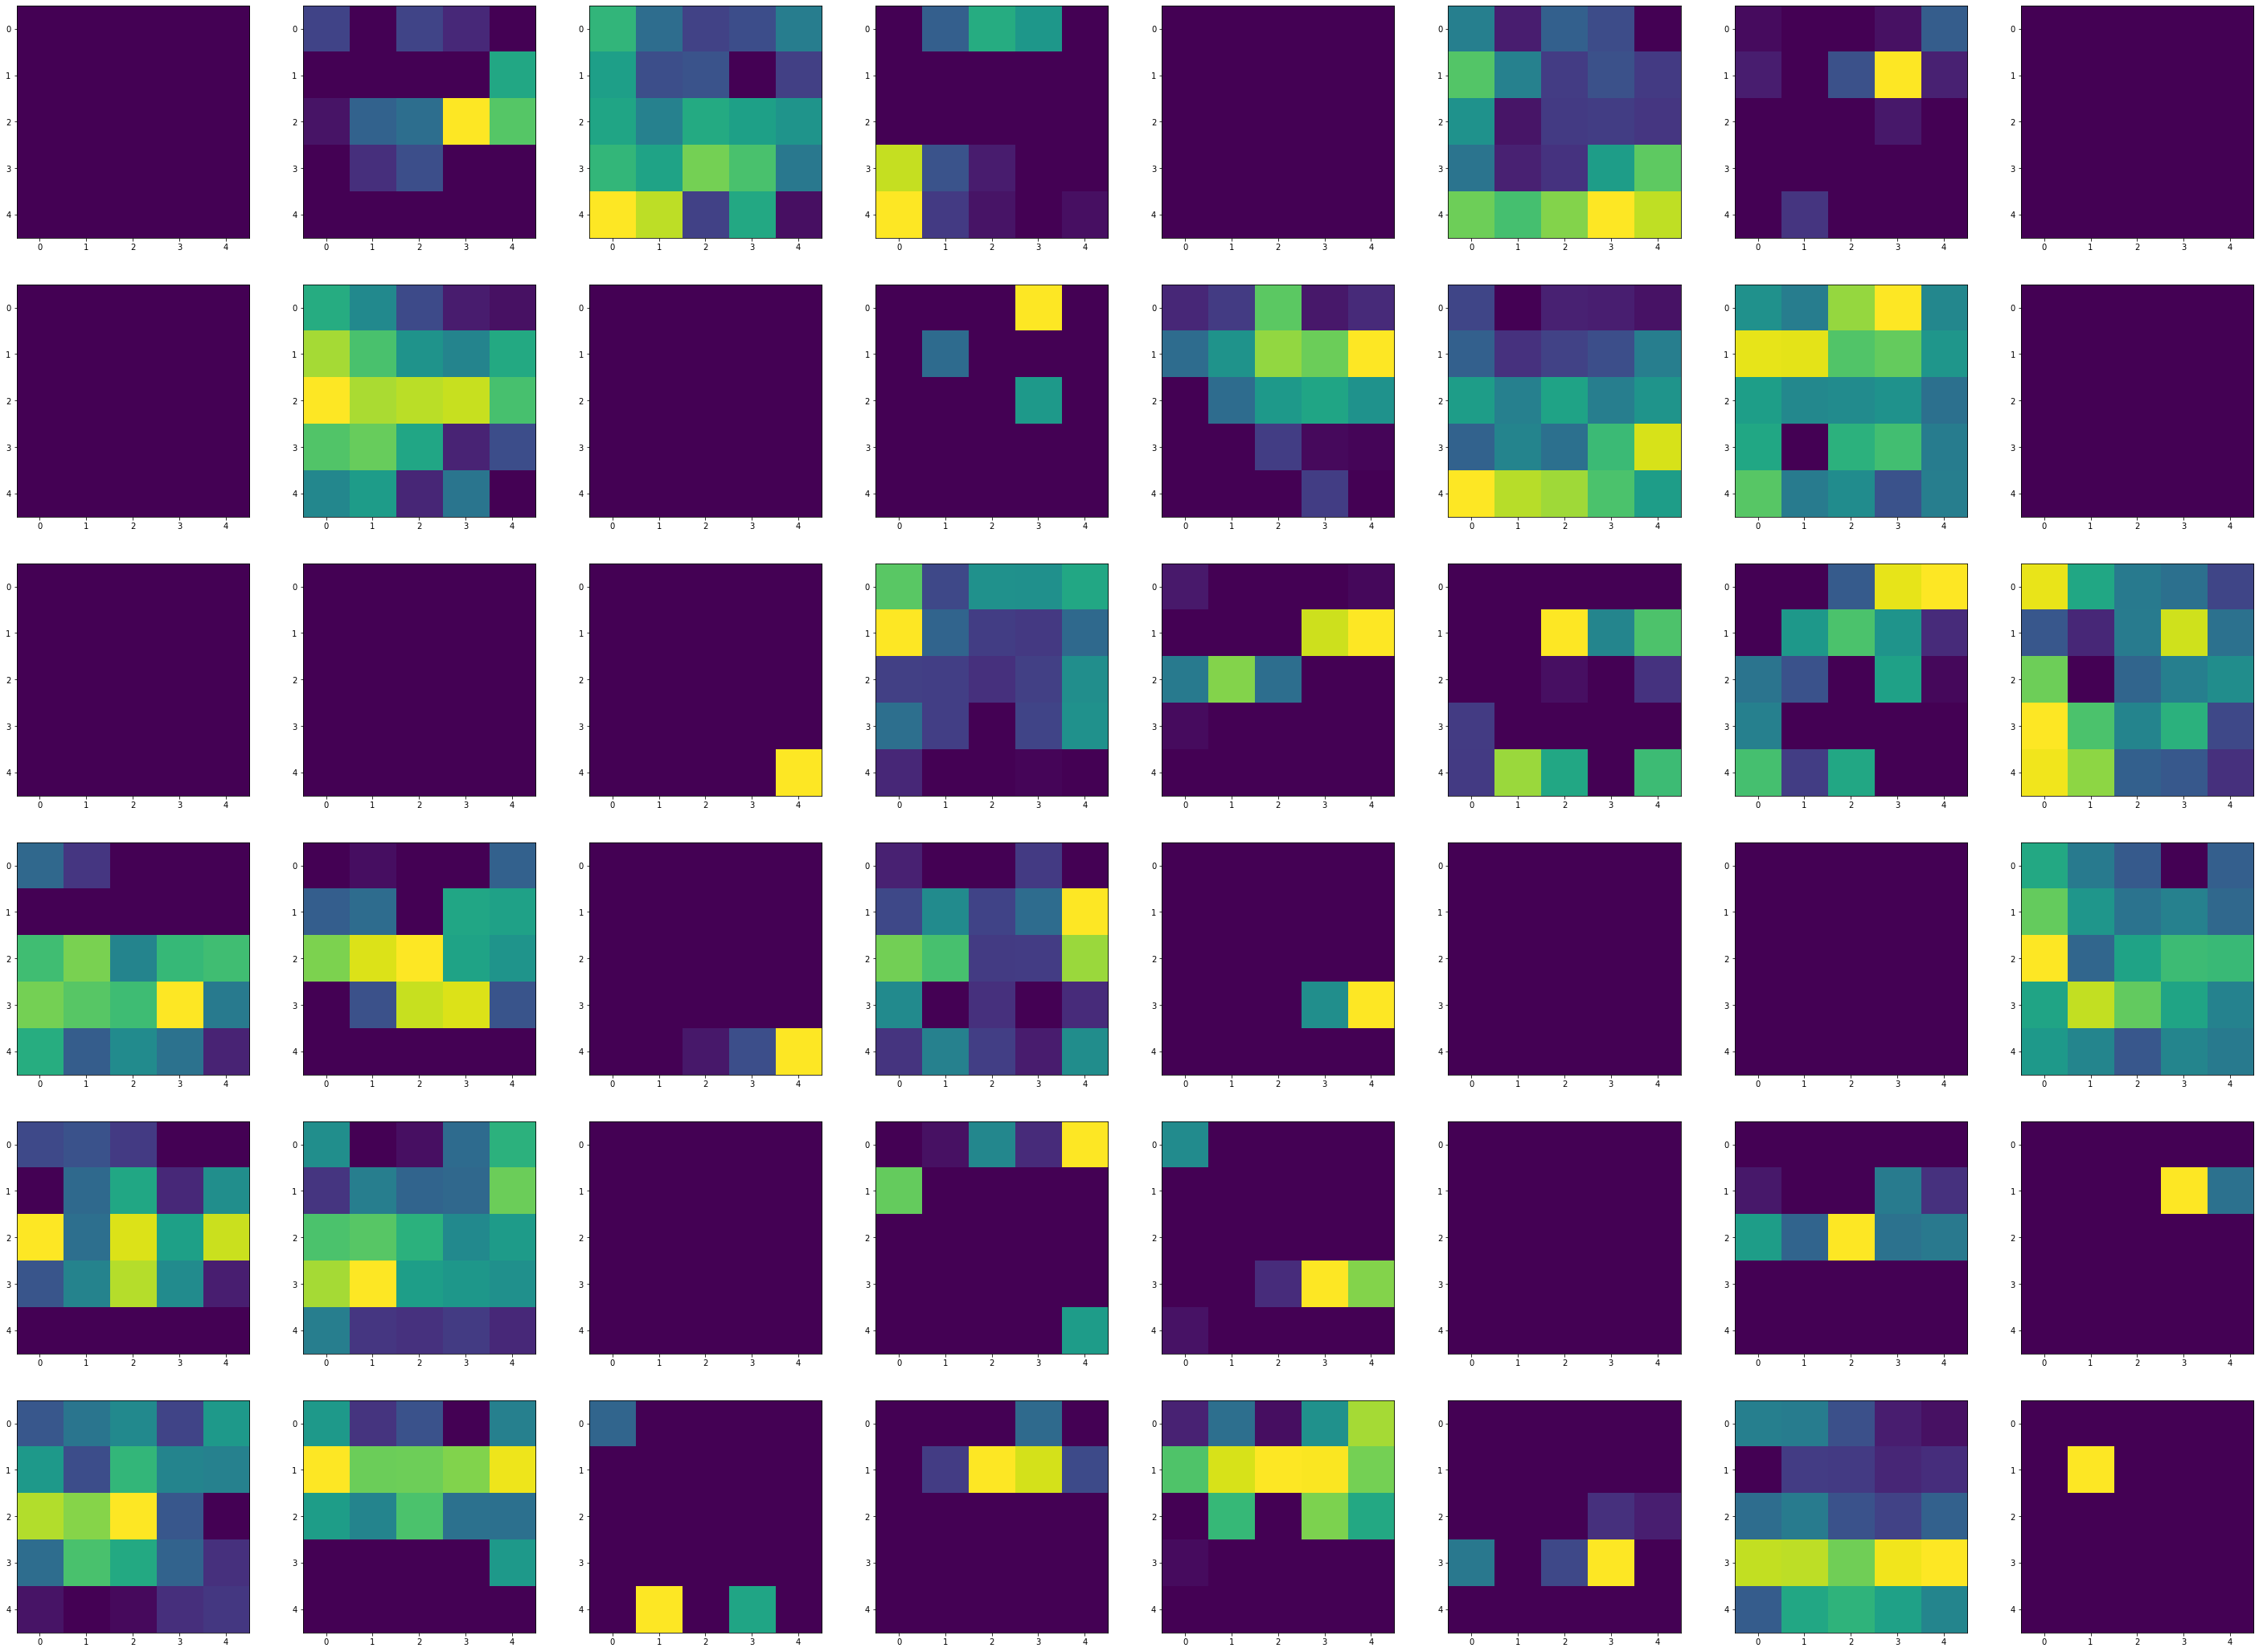

In [33]:
ins = model.inputs  # 모델 입력으로 (None, 100, 100, 3)의 형태를 갖습니다.
outs = model.layers[6].output # 여섯째 계층에 대한 출력으로 (None, 1000)의 형태를 갖습니다.
feature_map = Model(inputs=ins, outputs=outs) # ins와 outs를 모델 입력과 출력으로 사용하여 특성 맵을 정의합니다.

img=cv2.imread('/content/1.원천데이터/damage//0000283_as-0001700.jpg') #이미지 호출
img = cv2.resize(img, (100,100)) # 이미지 크기 조정
input_img = np.expand_dims(img, axis=0) # 이미지 차원 조정

feature = feature_map.predict(input_img) #이미지를 모델에 적용
fig = plt.figure(figsize=(50,50))
for i in range(48):
  ax = fig.add_subplot(8, 8, i+1) #subplot(m,n,p)는 m*n 그리드로 나누고, p로 지정된 위치에 자표축을 만듭니다.
  ax.imshow(feature[0,:,:,i])


# **모델: LeNet-5**

In [1]:
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout

In [81]:
# LeNet-5 클래스 생성
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu',
                        input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu'))
        self.add(Dense(84, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])


In [82]:
num_classes = 4

model = LeNet((100,100,3), num_classes)
model.summary()


Model: "le_net_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 100, 100, 6)       456       
                                                                 
 average_pooling2d_6 (Averag  (None, 50, 50, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 23, 23, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_5 (Flatten)         (None, 8464)              0         
                                                                 
 dense_17 (Dense)            (None, 120)               101

In [83]:
# 파라미터 초기화 및 데이터 호출

EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = #경로를 넣어주세요
valid_dir = #경로를 넣어주세요



In [84]:
# 이미지 데이터 증가
train = ImageDataGenerator(
          rescale=1./255,
          rotation_range=10,
          width_shift_range=0.1,
          height_shift_range=0.1,
          shear_range=0.1,
          zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir, 
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir, 
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 0 images belonging to 0 classes.


In [ ]:

# 이미지 데이터셋 분류에 대한 예측

class_names = ['Breakage', 'Crushed', 'Scratched', 'Separated']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [ ]:
# 텐서보드에 모델 훈련 과정 살펴보기

log_dir = # 로그파일이 기록될 위치 입니다.
tensorboard_callback = tf.keras.callback.TensorBoard(log_dir=log_dir,
                                                     histogram_freq=1, profile_batch=0)
model.fit(train_generator,
          epochs=EPOCHS,
          step_per_epoch=train_num // BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          callbacks=[tensorboard_callback],
          verbose=1)

# 모델: **VGG** 19

In [ ]:
from tensorflow.python import metrics
from tensorflow.python.ops import losses
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), stride=(2,2)))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), stride=(2,2)))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), stride=(2,2)))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), stride=(2,2)))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), stride=(2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation ='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(1000, activation='softmax'))

        self.compile(optimizer = tf.keras.optimizers.Adam(0.003), loss='categorical_crossentropy', metrics=['accuracy'])




# 모델: **VGG16**

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [5]:
pretrained_model = VGG16(weights='imagenet', include_top=False)

model = Sequential()
model.add(pretrained_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


# 모델: **AlexNet**

In [2]:
num_classes = 4 # 파손상태에 대한 분류

class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides=4, activation='relu',
                        input_shape=input_shape, padding="valid",
                        kernel_initializer='he_normal'))
        self.add(AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format='channels_last'))

        self.add(Conv2D(256, kernel_size=(5,5), strides=1, activation='relu', padding='same',
                        kernel_initializer='he_normal'))
        
        self.add(AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='valid',
                                  data_format='channels_last'))
        
        self.add(Conv2D(384, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(Conv2D(256, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='valid',
                                  data_format='channels_last'))

        
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(1000, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])

In [3]:
model = AlexNet((100,100,3), num_classes)
model.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 96)        34944     
                                                                 
 average_pooling2d (AverageP  (None, 11, 11, 96)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 256)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 384)         132